## Esercitazione 6 - 25 Marzo 2024

Scrivere le funzioni python `bisezione.py`, `falsi.py`,  che implementino rispettivamente il metodo di bisezione, di falsa posizione, delle corde, delle secanti e di Newton.

Le funzioni `bisezione.py`, `falsi.py` devono assumere come input:

-  gli estremi dell'intervallo [a,b], dominio di f.
-  il nome `fname` della funzione di cui calcolare lo zero
-  tolx: tolleranza per il testi di arresto per l'errore relativo tra due iterati successivi
-  tolf: tolleranza per il test di arresto sul valore della funzione
-  nmax= numero massimo di iterazioni
    
In output:
-      lo zero della funzione
-      il numero di iterazioni effettuate
-      una lista contenente tutti gli iterati xk



In [2]:
import math
def sign(x):
    return math.copysign(1,x)

In [4]:
def metodo_bisezione(fname, a, b, tolx):
    #tolx è la tolleranza
    fa = fname(a)
    fb = fname(b)
    if sign(fa*fb) >= 0:
        print("Impossibile applicare il metodo di bisezione")
        return None, None, None
    it = 0
    v_xk = []

    while abs(b - a) > tolx:
        xk = a + (b - a)/2
        v_xk.append(xk)
        it += 1
        fxk = fname(xk)
        if fxk == 0:
            return xk, it, v_xk
        
        if sign(fa*fxk) < 0:
            b = xk
            fb = fxk
        elif sign(fb*fxk) < 0:
            a = xk
            fa = fxk

    return xk, it, v_xk

In [6]:
def metodo_regula_falsi(fname, a, b, tolx, tolf, maxit):
    #tolx è la tolleranza su x e tolf è la tolleranza sulla funzione
    fa = fname(a)
    fb = fname(b)
    if sign(fa*fb) >= 0:
        print("Impossibile applicare il metodo di regula falsi")
        return None, None, None
    it = 0
    v_xk = []
    errore_x = 1 + tolx #così sicuro entra --> errore_x è l'errore relativo, a meno che xk sia == 0
    fxk = 1 + tolf #così sicuro entra
    xprec = a #inizializzo con un estremo

    while it < maxit and np.abs(fxk) > tolf and errore_x > tolx:
        xk = a - fa*(b - a)/(fb - fa)
        v_xk.append(xk)
        it += 1
        fxk = fname(xk)
        if fxk == 0:
            return xk, it, v_xk

        if sign(fa*fxk) < 0:
            b = xk
            fb = fxk
        elif sign(fb*fxk) < 0:
            a = xk
            fa = fxk
        if xk != 0:
            errore_x = abs(xk - xprec)/abs(xk)
        else:
            errore_x = abs(xk - xprec)
        xprec = xk
    return xk, it, v_xk

**Sperimentazione numerica**

## Esercizio 1 

 Confrontare i metodi sopra implementati nei casi seguenti:
- f(x) = $x^3-6x^2-4x+24$ in [-3,8], tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=-2,2,6);
- f(x) = exp(−x) − (x + 1) in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2]  tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3]  tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei casi 2-4.


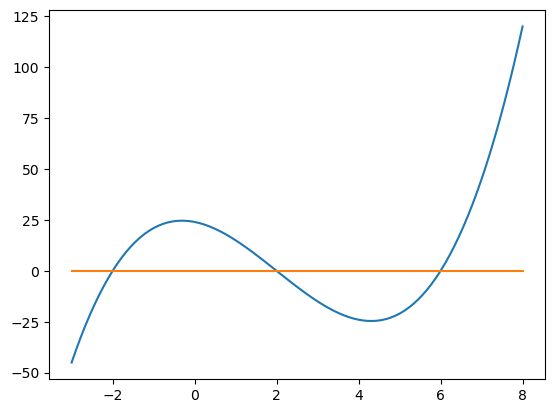

In [10]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: x**3 - 6*x**2 - 4*x + 24
x = np.linspace(-3.0, 8.0, 100)
plt.plot(x, f(x), x, np.zeros_like(x)) #la prof aveva messo np.ones_like(x)

In [11]:
a1 = -3.0
b1 = 0.0
tolx = 1e-12
xk, it, v_xk = metodo_bisezione(f, a1, b1, tolx)
print("Soluzione di bisezione", xk, "Numero di iterazioni del nostro algoritmo -->", it)

Soluzione di bisezione -2.0000000000002274 Numero di iterazioni del nostro algoritmo --> 42


Errore assoluto [5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11 1.45519152e-11
 7.27595761e-12 3.63797881e-12 1.81898940e-12 9.09494702e-13
 4.54747351e-13 2.27373675e-13]
Errore assoluto [9.56521739e-01 3.44079950e-01 1.07137672e-01 3.16678766e-02
 9.21026687e-03 2.66594705e-03 7.70597905e-04 2.22653540e-04
 6.43251696e-05 1.85830802e-05 5.36846653e-06 1.55089209e-06
 4.48035641e-07 1.29432531e-07 3.73916211e-08 1.08020242e-08
 3.12058468e-09 9.01502206e-10 2.60433897e-10 7.52364837e-11
 2.17352802e-11 6.279

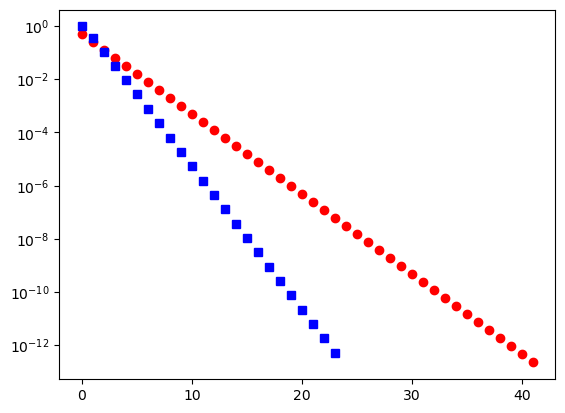

In [14]:
alpha = -2.0 #soluzione esatta dello zero nell'intervallo dato 
ek_bis = abs(np.array(v_xk) - alpha) #devo fare la conversione visto che v_xk è una lista e quindi un'operazione così darebbe errore
tolf = 1e-12
maxit = 100
xk_falsi, it_falsi, v_xk_falsi = metodo_regula_falsi(f, a1, b1, tolx, tolf, maxit)
ek_falsi = np.abs(np.array(v_xk_falsi) - alpha)
plt.semilogy(np.arange(it), ek_bis, "ro" )
plt.semilogy(np.arange(it_falsi), ek_falsi, "bs" )
print("Errore assoluto", ek_bis)
print("Errore assoluto", ek_falsi)

#ci vogliono tre iterazioni per trovare una cifra decimale in più

In [16]:
a2 = 0.0
b2 = 4.0
tolx = 1e-12
xk, it, v_xk = metodo_bisezione(f, a2, b2, tolx)
print("Soluzione di bisezione", xk, "Numero di iterazioni del nostro algoritmo -->", it)

Soluzione di bisezione 2.0 Numero di iterazioni del nostro algoritmo --> 1


C:\Users\dedde\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  func(*args, **kwargs)


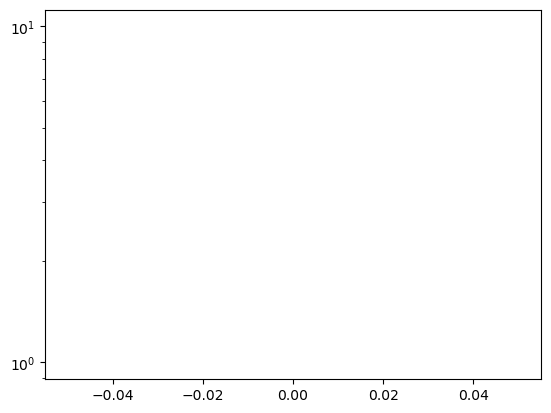

In [18]:
alpha = 2.0 #soluzione esatta dello zero nell'intervallo dato 
ek = abs(np.array(v_xk) - alpha) #devo fare la conversione visto che v_xk è una lista e quindi un'operazione così darebbe errore
plt.semilogy(np.arange(it), ek, "ro") 
#non si vede nulla visto che per la sola iterazione trova subito il risultato corretto -> np.array(v_xk)-alpha = 0

In [20]:
a3 = 4.0
b3 = 8.0
tolx = 1e-12
xk, it, v_xk = metodo_bisezione(f, a3, b3, tolx)
print("Soluzione di bisezione", xk, "Numero di iterazioni del nostro algoritmo -->", it)

Soluzione di bisezione 6.0 Numero di iterazioni del nostro algoritmo --> 1


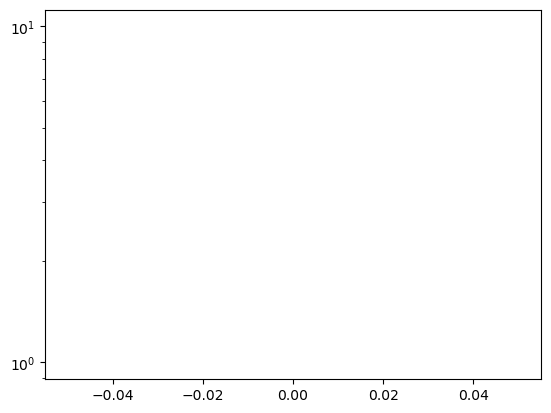

In [22]:
alpha = 6.0 #soluzione esatta dello zero nell'intervallo dato 
ek = abs(np.array(v_xk) - alpha) #devo fare la conversione visto che v_xk è una lista e quindi un'operazione così darebbe errore
plt.semilogy(np.arange(it), ek, "ro") 
#non si vede nulla visto che per la sola iterazione trova subito il risultato corretto -> np.array(v_xk)-alpha = 0

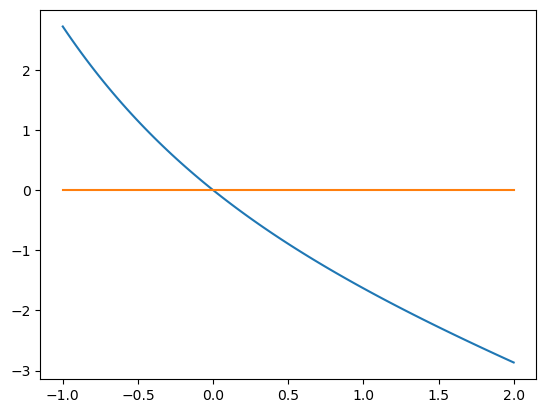

In [24]:
f1 = lambda x: np.exp(-x) - (x + 1) 
x = np.linspace(-1.0, 2.0, 100)
plt.plot(x, f1(x), x, np.zeros_like(x)) #la prof aveva messo np.ones_like(x)

In [26]:
a4 = -1.0
b4 = 2.0
tolx = 1e-12
xk, it, v_xk = metodo_bisezione(f1, a4, b3, tolx)
print("Soluzione di bisezione", xk, "Numero di iterazioni del nostro algoritmo -->", it)

Soluzione di bisezione 2.8421709430404007e-13 Numero di iterazioni del nostro algoritmo --> 44


## Esercizio 2

- Utilizzare il metodo di bisezione per calcolare la radice quadrata di 2. Analizzate i risultati.

In [85]:
f2 = lambda x: x**2 - 2
a5 = 1.0
b5 = 2.0
xk2, it2, v_xk2 = metodo_bisezione(f2, a5, b5, tolx)
print(xk2, it2)

1.4142135623724243 40


In [88]:
g = lambda x: math.log2(x + 3) - 2
a6 = -1
b6 = 2
xk3, it3, v_xk3 = metodo_bisezione(g, a6, b6, tolx)
print(xk3, it3)

1.0000000000002274 42


## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [63]:
import numpy.linalg as npl

In [65]:
#npl.norm(matrice, tipo_norma)
def mynorm1(B):
    c = np.sum(np.abs(B), axis=0) #vettore con i valori assoluti delle somme delle colonne
    n1 = np.max(c)
    return n1

In [66]:
A = np.array([[3.0, 7.0, 8.5],[-2, -3, 5],[-8, 12, 13]])
print(A)

[[ 3.   7.   8.5]
 [-2.  -3.   5. ]
 [-8.  12.  13. ]]


In [67]:
n1 = mynorm1(A)
print(n1)

26.5


In [68]:
norma1 = npl.norm(A, 1)
print("norma in numpy linalg", norma1)

norma in numpy linalg 26.5


In [71]:
#npl.norm(matrice, tipo_norma)
def mynormInf(B):
    c = np.sum(np.abs(B), axis=1) #vettore con i valori assoluti delle somme delle righe
    n_inf = np.max(c)
    return n_inf

In [76]:
n_inf = mynormInf(A)
print(n_inf)
norma_inf = npl.norm(A, np.inf)
print("norma in numpy linalg", norma_inf)

33.0
norma in numpy linalg 33.0


In [80]:
#npl.norm(matrice, tipo_norma)
def mynorm2(B):
    p = np.max(npl.eigvals(B.T@B))
    n2 = np.sqrt(p)
    return n2

In [82]:
n2 = mynorm2(A)
print(n2)
norma2 = npl.norm(A, 2)
print("norma in numpy linalg", norma2)

21.66176399564415
norma in numpy linalg 21.66176399564415


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [83]:
A = np.array([[4, -1, 6],[2, 3, -3],[1, -2, 9/2]])
n2 = mynorm2(A)
print(n2)
norma2 = npl.norm(A, 2)
print("norma in numpy linalg", norma2)

9.056251013341882
norma in numpy linalg 9.056251013341878


In [84]:
errore_rel = np.abs(n2 - norma2)/np.abs(norma2)
print("Errore relativo", errore_rel)

Errore relativo 3.92294082128086e-16
